In [1]:
import pandas as pd

In [2]:
df_deaths = pd.read_csv("../static/data/deaths.csv")
df_cases = pd.read_csv("../static/data/cases.csv")
df_recoveries = pd.read_csv("../static/data/recoveries.csv")

In [3]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
def calc_sum(df, column):
    result = 0
    for i in range(0, len(df.values)):
        result += int(df.values[i][column])
    return result

In [5]:
def get_deaths():
    calc_sum(df_deaths, -1)
    
    
def get_cases():
    calc_sum(df_cases, -1)

    
def get_cases():
    calc_sum(df_cases, -1)

In [6]:
def get_all_sums(df):
    ls = []
    for i in range(4, len(df.columns)):
        ls.append(calc_sum(df,i))
    return ls

In [7]:
def get_time_series_cases():
    return get_all_sums(df_cases)
    
    
def get_time_series_deaths():
    return get_all_sums(df_deaths)
    
    
def get_time_series_recoveries():
    return get_all_sums(df_recoveries)


def get_active_cases():
    cases = get_time_series_cases()
    deaths = get_time_series_deaths()
    recoveries = get_time_series_recoveries()
    
    active_cases = []
    
    for i in range(len(cases)):
        active_cases.append(cases[i] - deaths[i] - recoveries[i])

    return active_cases

In [8]:
cases_time_series = get_time_series_cases()

In [9]:
deaths_time_series = get_time_series_deaths()

In [10]:
recoveries_time_series = get_time_series_recoveries()

In [11]:
active_cases_time_series = get_active_cases()

In [12]:
dates = list(df_cases.columns[4:])
print(dates)

['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20']


In [13]:
from matplotlib import pyplot as plt

In [14]:
def create_time_series_plot(data, title, to_file):
    plt.title(f"COVID-19 {title}")
    plt.xticks(list(range(0,len(dates),10)))
    plt.plot(dates, data)
    plt.savefig(to_file)

In [15]:
def create_cases_plot(to_file):
    create_time_series_plot(cases_time_series, "Cases", to_file)

In [16]:
def create_deaths_plot(to_file):
    create_time_series_plot(deaths_time_series, "Deaths", to_file)

In [17]:
def create_recoveries_plot(to_file):
    create_time_series_plot(recoveries_time_series, "Recoveries", to_file)

In [18]:
def create_active_cases_plot(to_file):
    create_time_series_plot(active_cases_time_series, "Active Cases", to_file)

In [19]:
import numpy as np

In [20]:
def get_poly_fit(series, deg):
    x = np.arange(len(series))
    y = np.array(series)
    return np.polyfit(x, y, deg)  

In [21]:
get_poly_fit(cases_time_series,3)

array([ 9.04595225e+00, -6.98790555e+02,  1.65897718e+04, -6.08231257e+04])

In [29]:
def calc_poly(polie, number):
    result = 0
    for power, factor in enumerate(reversed(polie)):
        result += factor * (number ** power)
    return result

def plot_poly(polies, series, to_file, title):
    fig, ax = plt.subplots()
    x = np.arange(len(series))
    
    forecast_days = 20
    
    longer_dates_ls = longer_dates(forecast_days)
    
    longer_dates_ls_short = []
    
    for i in range(0, len(longer_dates_ls), 20):
        longer_dates_ls_short.append(longer_dates_ls[i])
    
    ax.set_title(title)
    ax.set_xticks(list(range(0, len(series) + forecast_days, 20)))
    ax.set_xticklabels(longer_dates_ls_short)
    ax.scatter(x, series, s=2, c="red", label=title)
    
    poly_line_x = np.arange(len(series) + forecast_days)
    poly_line_y = list(map(lambda num: calc_poly(polies, num) , poly_line_x))
    ax.plot(poly_line_x, poly_line_y, "--", label="best fit line")
    ax.legend()
    fig.show()
    fig.savefig(to_file)


In [23]:
from datetime import datetime, timedelta

def longer_dates(longer):
    last_date = dates[-1]
    year = int("20" + last_date.split("/")[2])
    month = int(last_date.split("/")[0])
    day = int(last_date.split("/")[1])
    date = datetime(year,month,day)
    new_dates = []
    for i in range(longer):
        date += timedelta(days=1)
        new_dates.append(date.strftime("%m/%d/%y"))
    return dates + new_dates    

/home/tobias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


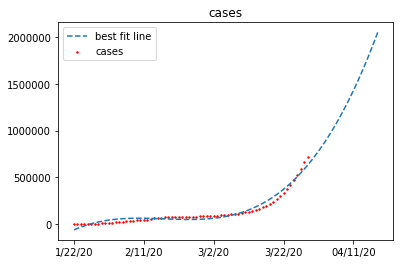

In [38]:
plot_poly(get_poly_fit(cases_time_series, 3), cases_time_series, "lol.svg", "cases")